# **COGS 118B Final Project** 

## **Members**:


*  Anjali Ramesh : A15524912
*  Ashna Sood : A15464709 
*  Harmeena Sandhu : A15534745
*  Nimisha Devanagondi :  A14559110
*  Urmi Suresh : A15593367










Dataset Citation:

[1] Murat KOKLU [2] Ilker Ali OZKAN. UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset ]. Irvine, CA: University of California, School of Information and Computer Science.

## **Introduction**

In [ ]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
import os 

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats

#import patsy
#import statsmodels.api as sm
import scipy.stats as stats
from scipy.spatial.distance import cdist

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_absolute_error, mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
# K-Means
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Cleanup**

In [ ]:
# load in beans dataset
df = pd.read_csv("/content/drive/MyDrive/COGS 118B Final Project/data/Dry_Beans_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
df = df.rename(columns={"roundness":"Roundness", "AspectRation":"AspectRatio"})
df = df.dropna()
df_features = df.drop(columns={"Class"})

df_features

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [ ]:
# check for null values 
print("Missing Values?",df_features.isna().values.any())

Missing Values? False


## **EDA**


In [ ]:
# show the described data
df_features.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
# see all column names to scope the most important features 
df_features.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [ ]:
# see # of Bean classes and frequency of each class -- 7 classes 
df["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [ ]:
#features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
      #  'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
      #  'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
      #  'ShapeFactor3', 'ShapeFactor4']
beans_corrs = df_features.corr()
beans_corrs = beans_corrs.round(3)
beans_corrs

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000,0.967,0.932,0.952,0.242,0.267,1.000,0.985,0.054,-0.197,-0.358,-0.268,-0.848,-0.639,-0.272,-0.356
Perimeter,0.967,1.000,0.977,0.913,0.385,0.391,0.968,0.991,-0.021,-0.304,-0.548,-0.407,-0.865,-0.768,-0.408,-0.429
MajorAxisLength,0.932,0.977,1.000,0.826,0.550,0.542,0.933,0.962,-0.078,-0.284,-0.596,-0.568,-0.774,-0.859,-0.568,-0.483
MinorAxisLength,0.952,0.913,0.826,1.000,-0.009,0.020,0.951,0.949,0.146,-0.156,-0.210,-0.015,-0.947,-0.471,-0.019,-0.264
AspectRatio,0.242,0.385,0.550,-0.009,1.000,0.924,0.243,0.304,-0.370,-0.268,-0.767,-0.988,0.025,-0.838,-0.979,-0.449
Eccentricity,0.267,0.391,0.542,0.020,0.924,1.000,0.269,0.319,-0.319,-0.298,-0.722,-0.970,0.020,-0.860,-0.981,-0.449
ConvexArea,1.000,0.968,0.933,0.951,0.243,0.269,1.000,0.985,0.053,-0.206,-0.362,-0.270,-0.848,-0.641,-0.274,-0.362
EquivDiameter,0.985,0.991,0.962,0.949,0.304,0.319,0.985,1.000,0.028,-0.232,-0.436,-0.328,-0.893,-0.713,-0.330,-0.393
Extent,0.054,-0.021,-0.078,0.146,-0.370,-0.319,0.053,0.028,1.000,0.191,0.344,0.354,-0.142,0.238,0.348,0.149
Solidity,-0.197,-0.304,-0.284,-0.156,-0.268,-0.298,-0.206,-0.232,0.191,1.000,0.607,0.304,0.153,0.344,0.308,0.702


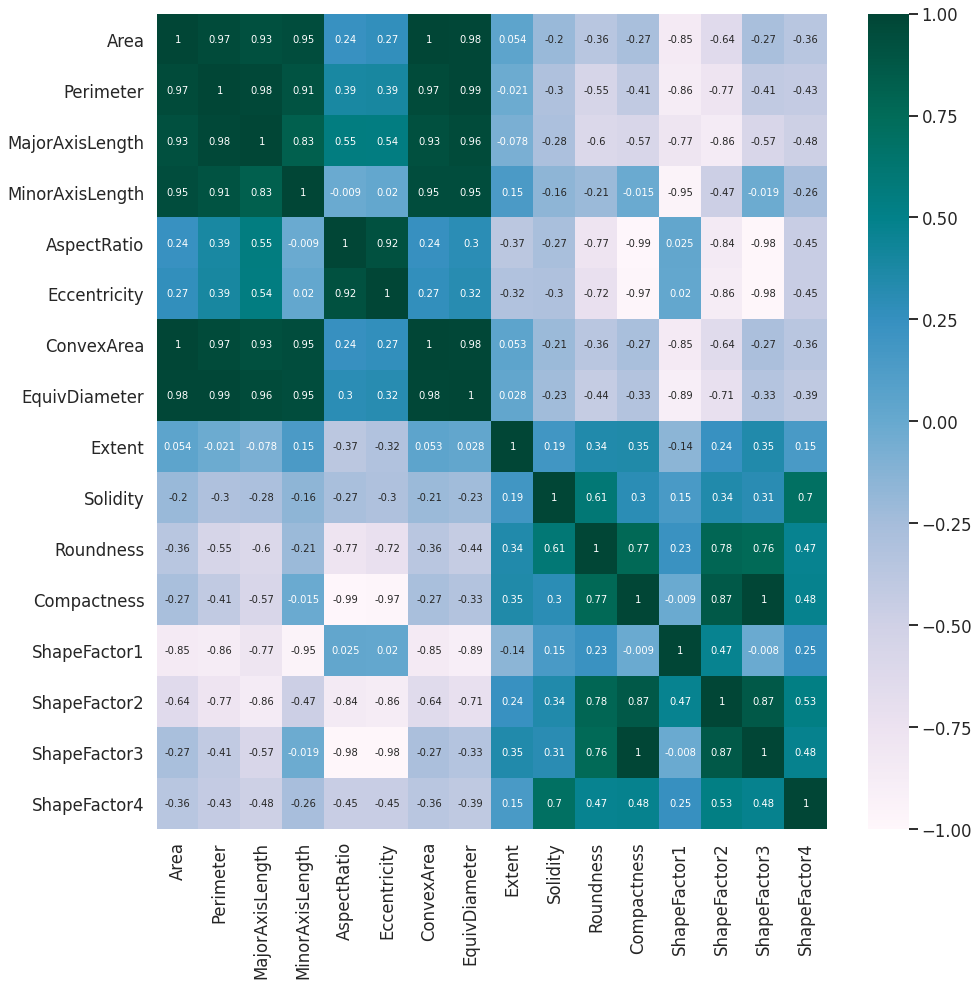

In [ ]:
# visualize correlation matrix in a heatmap to easily depict the highly correlated variables
plt.figure(figsize=(15,15))
sns.heatmap(beans_corrs, annot=True, vmin=-1.0, cmap='PuBuGn')
sns.set(font_scale=1.4)
plt.show()

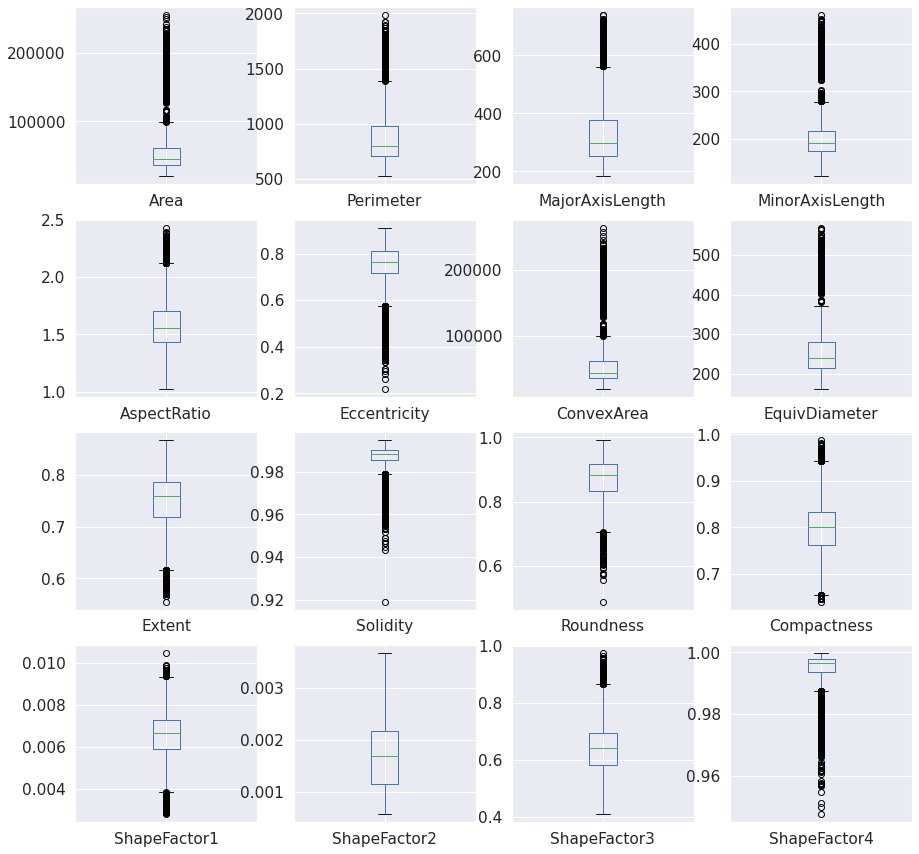

In [ ]:
df_features.plot(kind='box', figsize=(15, 15), subplots=True, layout=(4, 4))
plt.show()

## **Data Analysis**

### **K-Means Clustering From Scratch**

In [ ]:
# taken from cogs 118b homework 2

def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1],
                              [0.8, 0.3, 0.1],
                              [0.4, 0.6, 0.2],
                              [0.2, 0.5, 0.7]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [ ]:
def calcSqDistances(X, Kmus):
    # initialize distances array 
    sqdistances = np.zeros((X.shape[0], len(Kmus)))
    
    # loop through all of data and calculate distances between each data point 
    # and each respective existing cluster center 
    for i in range(len(X)):
        for k in range(len(Kmus)):
            a = math.pow((X[i][0] - Kmus[k][0]), 2)
            b = math.pow((X[i][1] - Kmus[k][1]), 2)
            sqdistances[i][k] = math.sqrt(a + b)
                
    return sqdistances

In [ ]:
def determineRnk(sqDmat):
    # initialize cluster rank array 
    sqdrows = sqDmat.shape[0]; sqdcols = sqDmat.shape[1]
    cluster_rnk = np.zeros((sqdrows, sqdcols))
    
    # loop through given squared distances and for each row, set the column with the smallest 
    # distance equal to 1 
    for i in range(sqdrows):
        smallerColumnInd = np.argmin(sqDmat[i])
        cluster_rnk[i][smallerColumnInd] = 1
        
    return cluster_rnk

In [ ]:
## based off of cogs 109 assignment 5

def recalcMus(X, Rnk):
    # intialize new cluster center array 
    #clusterCenters = np.zeros((Rnk.shape[1], 2))
    clusterCenters = np.zeros((Rnk.shape[1], X.shape[1]))
    
    # loop through the number of k values (clusters)
    for kvalue in range(Rnk.shape[1]):
        newClusters = []
        # for each data value, update the cluster centers based on where the 1 is in the one hot encoding 
        # take the means of the new clusterings 
        for xvalue in range(X.shape[0]):
            if Rnk[xvalue][kvalue] == 1:
                newClusters.append(X[xvalue])
        #clusterCenters[kvalue] = (np.mean(np.array(newClusters), axis=0)).tolist()
        clusterCenters[kvalue] = (np.mean(newClusters, axis = 0).tolist())
          
    return clusterCenters

In [ ]:
def runKMeans(K, fileString):
    # Load data file specified by fileStringfrom Bishop book
    X = np.loadtxt(fileString)

    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];
    
    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector as per Bishop (9.2)
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);

        # given the matrix of squared distances, determine the closest cluster
        # center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # per Bishop (9.2)
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        
        if iter == 0:
          plotCurrent(X, Rnk, Kmus)
          plt.show()
        
        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)
        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    plotCurrent(X,Rnk,Kmus)
    return Rnk 

#### **K-Means Testing with various K values**

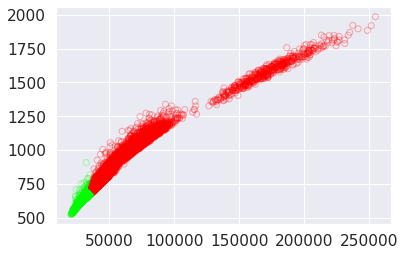

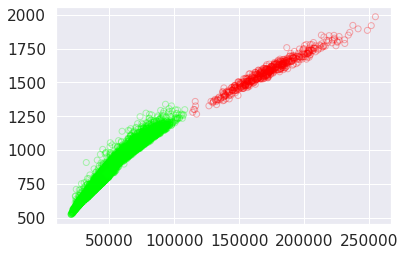

In [ ]:
# k = 2
Rnk2 = runKMeans(2, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

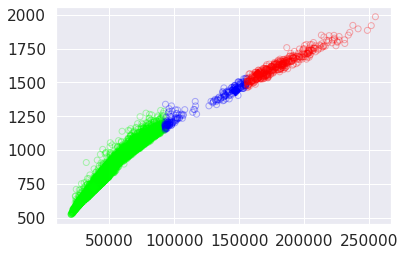

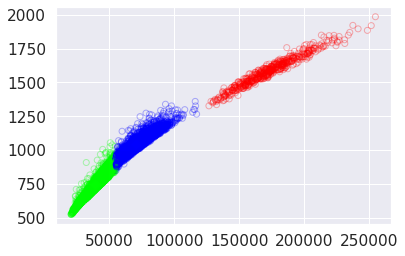

In [ ]:
# k = 3
Rnk3 = runKMeans(3, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

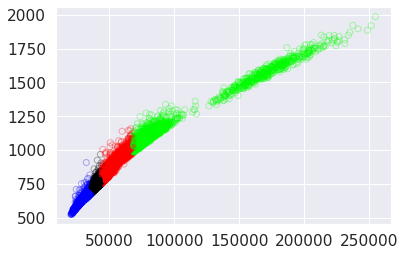

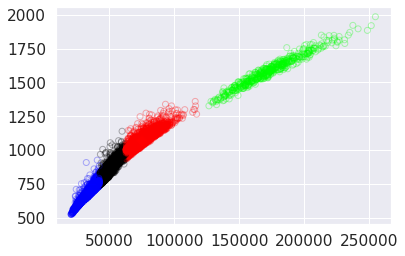

In [ ]:
# k = 4
Rnk4 = runKMeans(4, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

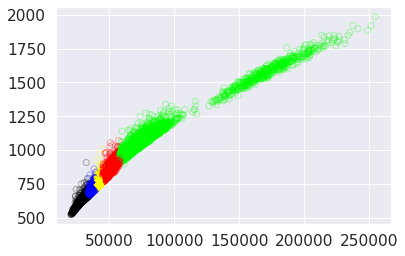

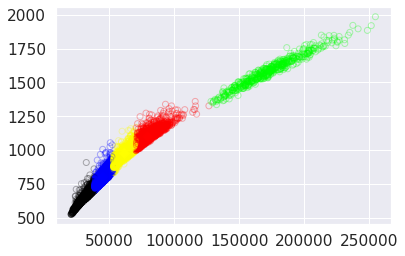

In [ ]:
# k = 5
Rnk5 = runKMeans(5, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

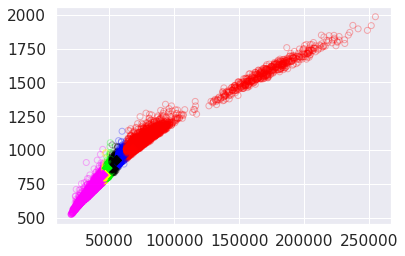

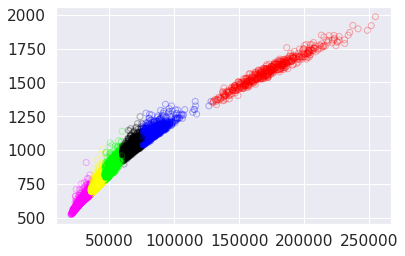

In [ ]:
# k = 6
Rnk6 = runKMeans(6, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

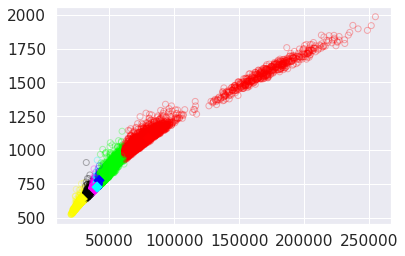

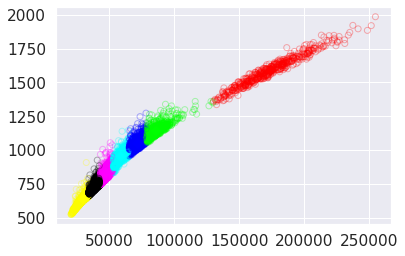

In [ ]:
# k = 7
Rnk7 = runKMeans(7, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

##### **7 Clusters Analysis of Preds vs Actual Bean Distribtuion**

In [ ]:
# Create a dataframe for the outputted cluster memberships with 7 clusters 
df_Rnk7 = pd.DataFrame(Rnk7)
df_Rnk7

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
13606,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Create a copy of the original dataframe
df_copy = df.copy()

# Merge df_Rnk7 with df_copy
df_copy = df_copy.merge(df_Rnk7, left_index=True, right_index=True)
df_copy

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# place all the data values in cluster 0 in a dataframe
df0_Rnk7 = df_copy.loc[df_copy[0] == 1]
print("Number of beans in Cluster 0:", df0_Rnk7[0].value_counts())
# see Distribution of actual bean types in Cluster 0 
df0_Rnk7["Class"].value_counts()

Number of beans in Cluster 0: 1.0    516
Name: 0, dtype: int64


BOMBAY    516
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 1 in a dataframe
df1_Rnk7 = df_copy.loc[df_copy[1] == 1]
print("Number of beans in Cluster 1:", df1_Rnk7[1].value_counts())
# see Distribution of actual bean types in Cluster 1 
df1_Rnk7["Class"].value_counts()

Number of beans in Cluster 1: 1.0    795
Name: 1, dtype: int64


CALI        544
BARBUNYA    244
BOMBAY        6
HOROZ         1
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 2 in a dataframe
df2_Rnk7 = df_copy.loc[df_copy[2] == 1]
print("Number of beans in Cluster 2:", df2_Rnk7[2].value_counts())
# see Distribution of actual bean types in Cluster 2 
df2_Rnk7["Class"].value_counts()

Number of beans in Cluster 2: 1.0    1668
Name: 2, dtype: int64


CALI        904
BARBUNYA    658
HOROZ       106
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 3 in a dataframe
df3_Rnk7 = df_copy.loc[df_copy[3] == 1]
print("Number of beans in Cluster 3:", df3_Rnk7[3].value_counts())
# see Distribution of actual bean types in Cluster 0 
df3_Rnk7["Class"].value_counts()

Number of beans in Cluster 3: 1.0    3680
Name: 3, dtype: int64


SEKER       1375
DERMASON    1213
SIRA         945
HOROZ        144
BARBUNYA       3
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 4 in a dataframe
df4_Rnk7 = df_copy.loc[df_copy[4] == 1]
print("Number of beans in Cluster 4:", df4_Rnk7[4].value_counts())
# see Distribution of actual bean types in Cluster 4 
df4_Rnk7["Class"].value_counts()

Number of beans in Cluster 4: 1.0    2536
Name: 4, dtype: int64


DERMASON    2333
SEKER        176
SIRA          18
HOROZ          9
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 5 in a dataframe
df5_Rnk7 = df_copy.loc[df_copy[5] == 1]
print("Number of beans in Cluster 5:", df5_Rnk7[5].value_counts())
# see Distribution of actual bean types in Cluster 5 
df5_Rnk7["Class"].value_counts()

Number of beans in Cluster 5: 1.0    2819
Name: 5, dtype: int64


SIRA        1574
HOROZ        722
SEKER        447
BARBUNYA      68
CALI           8
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 6 in a dataframe
df6_Rnk7 = df_copy.loc[df_copy[6] == 1]
print("Number of beans in Cluster 6:", df6_Rnk7[6].value_counts())
# see Distribution of actual bean types in Cluster 6 
df6_Rnk7["Class"].value_counts()

Number of beans in Cluster 6: 1.0    1597
Name: 6, dtype: int64


HOROZ       946
BARBUNYA    349
CALI        174
SIRA         99
SEKER        29
Name: Class, dtype: int64

In [ ]:
# breakdown of actual bean classes
df_copy["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

##### **Further clustering analysis with higher K values**

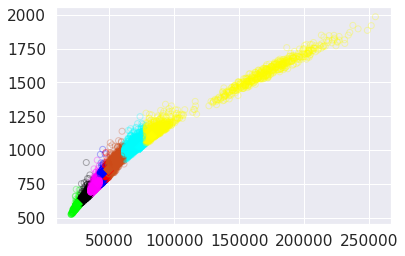

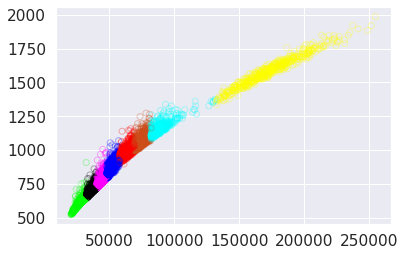

In [ ]:
# k = 8
Rnk8 = runKMeans(8, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

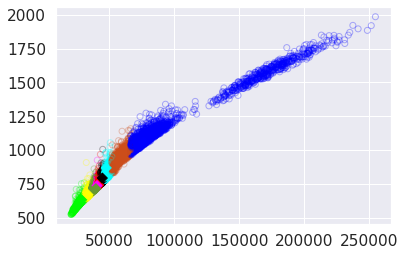

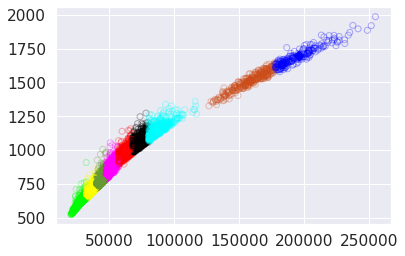

In [ ]:
# k = 9
Rnk9 = runKMeans(9, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

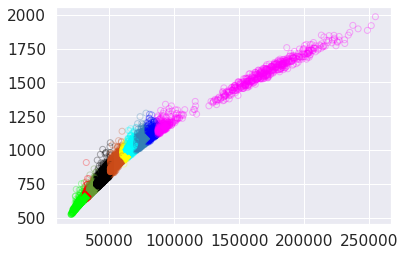

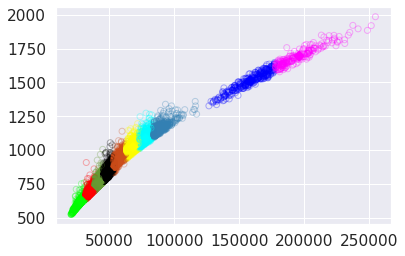

In [ ]:
# k = 10
Rnk10 = runKMeans(10, "/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt")

### **K-Means Clustering using Sklearn**

In [ ]:
# initial exploration of K-Means Clustering to create various bean clusters 
def kmeans_sse(k):
  km = KMeans(n_clusters=k)
  print(f'fitting for k={k}')
  km = km.fit(df_features)
  print('completed\n')
  # SSE of distance to closest cluster center
  return km.inertia_

sse = [kmeans_sse(k) for k in range(1, 20)]

fitting for k=1
completed

fitting for k=2
completed

fitting for k=3
completed

fitting for k=4
completed

fitting for k=5
completed

fitting for k=6
completed

fitting for k=7
completed

fitting for k=8
completed

fitting for k=9
completed

fitting for k=10
completed

fitting for k=11
completed

fitting for k=12
completed

fitting for k=13
completed

fitting for k=14
completed

fitting for k=15
completed

fitting for k=16
completed

fitting for k=17
completed

fitting for k=18
completed

fitting for k=19
completed



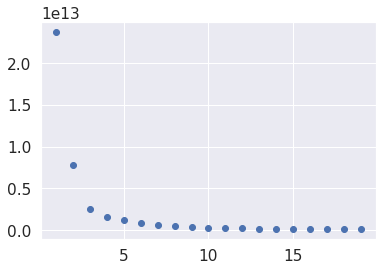

In [ ]:
# plot to see which number of clusters performs relatively the best
plt.scatter(range(1, 20), sse)

In [ ]:
# perform K means clustering to create K clusters
def kmeans_predict(k, input_data):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(input_data)
  return kmeans.predict(input_data), kmeans.labels_

In [ ]:
# Create a copy of the original dataframe
df_copy2 = df.copy()

In [ ]:
df_copy2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


##### **7 Clusters Analysis of Preds vs Actual Bean Distribtuion**

In [ ]:
# 7 clusters -- optimal number of clusters 
y_kmeans7, labels = kmeans_predict(7, df_features)
df_copy2['Pred cluster'] = y_kmeans7
df_copy2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Pred cluster
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,6
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,6
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,6
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,6
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,2
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,2
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,2
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,2


In [ ]:
# place all the data values in cluster 0 in a dataframe
df0 = df_copy2.loc[df_copy2["Pred cluster"] == 0]

print("Number of beans in Cluster 0:", df0.shape[0])
# see Distribution of actual bean types in Cluster 0 
df0["Class"].value_counts()

Number of beans in Cluster 0: 1917


CALI        776
BARBUNYA    734
HOROZ       404
SIRA          2
SEKER         1
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 1 in a dataframe
df1 = df_copy2.loc[df_copy2["Pred cluster"] == 1]

print("Number of beans in Cluster 1:", df1.shape[0])
# see Distribution of actual bean types in Cluster 1
df1["Class"].value_counts()

Number of beans in Cluster 1: 303


BOMBAY    303
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 2 in a dataframe
df2 = df_copy2.loc[df_copy2["Pred cluster"] == 2]

print("Number of beans in Cluster 2:", df2.shape[0])
# see Distribution of actual bean types in Cluster 2
df2["Class"].value_counts()

Number of beans in Cluster 2: 4191


SIRA        1640
SEKER       1423
DERMASON     849
HOROZ        267
BARBUNYA      10
CALI           2
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 3 in a dataframe
df3 = df_copy2.loc[df_copy2["Pred cluster"] == 3]

print("Number of beans in Cluster 3:", df3.shape[0])
# see Distribution of actual bean types in Cluster 3
df3["Class"].value_counts()

Number of beans in Cluster 3: 1197


CALI        802
BARBUNYA    390
HOROZ         3
BOMBAY        2
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 4 in a dataframe
df4 = df_copy2.loc[df_copy2["Pred cluster"] == 4]

print("Number of beans in Cluster 4:", df4.shape[0])
# see Distribution of actual bean types in Cluster 4
df4["Class"].value_counts()

Number of beans in Cluster 4: 2607


HOROZ       1234
SIRA         943
SEKER        192
BARBUNYA     188
CALI          50
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 5 in a dataframe
df5 = df_copy2.loc[df_copy2["Pred cluster"] == 5]

print("Number of beans in Cluster 5:", df5.shape[0])
# see Distribution of actual bean types in Cluster 5
df5["Class"].value_counts()

Number of beans in Cluster 5: 217


BOMBAY    217
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 6 in a dataframe
df6 = df_copy2.loc[df_copy2["Pred cluster"] == 6]

print("Number of beans in Cluster 6:", df6.shape[0])
# see Distribution of actual bean types in Cluster 6
df6["Class"].value_counts()

Number of beans in Cluster 6: 3179


DERMASON    2697
SEKER        411
SIRA          51
HOROZ         20
Name: Class, dtype: int64

In [ ]:
# breakdown of predicted bean clusters
df_copy2["Pred cluster"].value_counts()

2    4191
6    3179
4    2607
0    1917
3    1197
1     303
5     217
Name: Pred cluster, dtype: int64

In [ ]:
# breakdown of actual bean classes
df_copy2["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

### **PCA From Scratch**

In [ ]:
# Code from COGS 118B homework 4
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

# normc(M) normalizes the columns of M to a length of 1.

def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [ ]:
beans = np.loadtxt('/content/drive/MyDrive/COGS 118B Final Project/data/Beans.txt')

In [ ]:
# Find the mean of the data
mean = np.mean(beans, axis = 1)
reshape_mean = np.reshape(mean, (13611, 1))

# Find sample covariance matrix 
m,n = beans.shape
## Create Z, the zero-meaned data matrix
means = np.tile(reshape_mean, (1, n))
Z = beans - means

# Calculate C, the covariance matrix
C = np.matmul(Z.T, Z)

# Calculate eigenvectors (V) and eigenvalues (D) 
D, V = np.linalg.eig(C)

# Sort the eigenvectors based on the eigenvalues
Vs, Ds = eigsort(V, D) 

# Calculate matrix of eigenvectors
U = np.matmul(Z, V)

# Normalize cols of U to all have length 1 
U = normc(U)

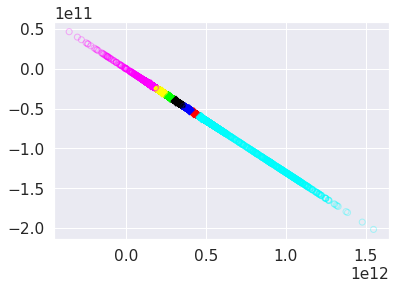

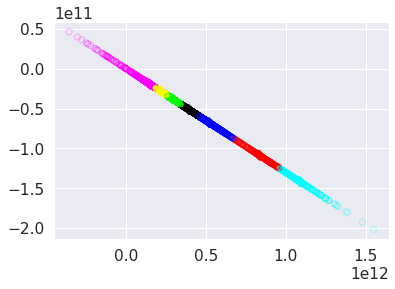

In [ ]:
# Reconstruct data using the top 5 principal components 
ReconstData5 = np.matmul(U[:, 0:5], C[0:5]) + reshape_mean

np.savetxt("/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst5.txt", ReconstData5, delimiter= "\t") 

# Run K-Means (from scratch) on the reconstructed data
# k = 7
Rnk_PC5 = runKMeans(7, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst5.txt") 

In [ ]:
# Reconstruct data using the top 10 principal components 
ReconstData10 = np.matmul(U[:, 0:10], C[0:10]) + reshape_mean

np.savetxt("/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt", ReconstData10, delimiter= "\t") 

#### **K Means with various K Values from scratch using Reconstructed Data with 10 Principal Components** 

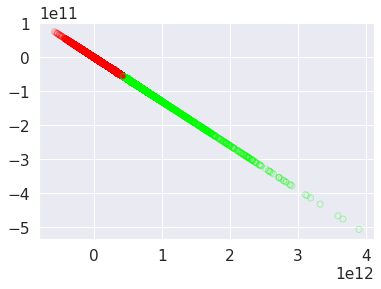

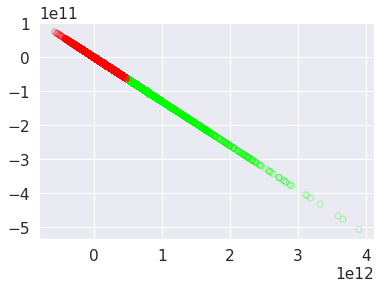

In [ ]:
# k = 2
Rnk2_PC10 = runKMeans(2, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

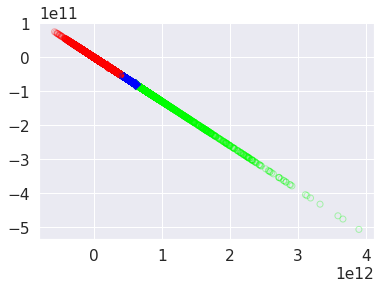

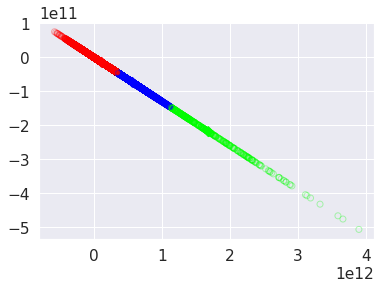

In [ ]:
# k = 3
Rnk3_PC10 = runKMeans(3, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

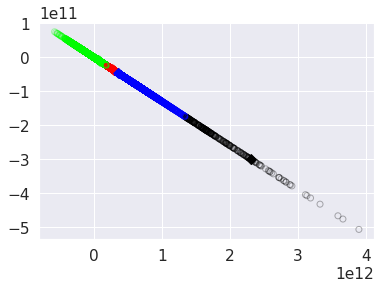

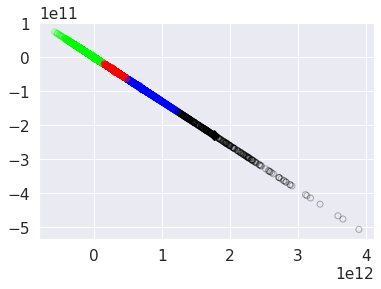

In [ ]:
# k = 4
Rnk4_PC10 = runKMeans(4, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

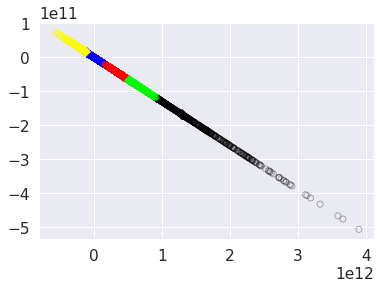

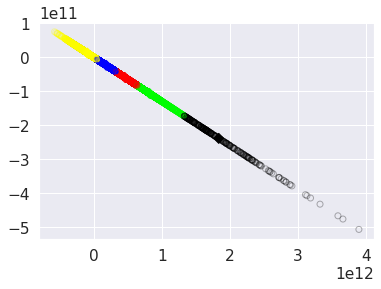

In [ ]:
# k = 5
Rnk5_PC10 = runKMeans(5, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

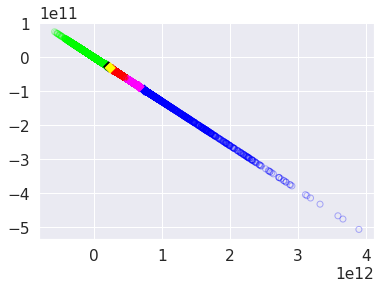

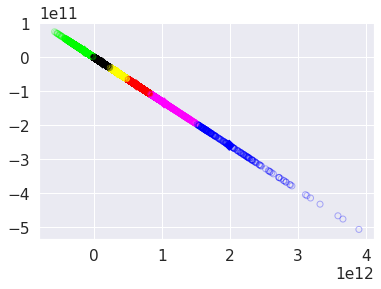

In [ ]:
# k = 6
Rnk6_PC10 = runKMeans(6, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

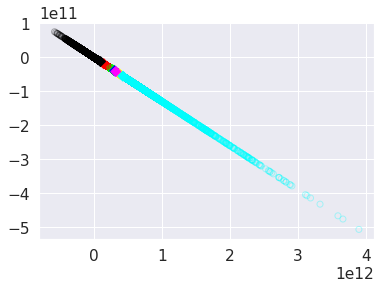

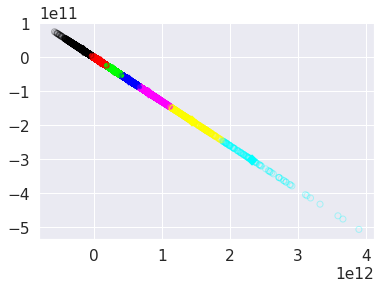

In [ ]:
# k = 7
Rnk7_PC10 = runKMeans(7, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

##### **7 Clusters Analysis of Preds vs Actual Bean Distribtuion**

In [ ]:
# Create a dataframe for the outputted cluster memberships with 7 clusters 
df_Rnk7_PC10 = pd.DataFrame(Rnk7_PC10)
df_Rnk7_PC10

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
13606,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13607,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13608,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13609,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Create a copy of the original dataframe
df_copy3 = df.copy()

# Merge df_Rnk7_PC10 with df_copy3
df_copy3 = df_copy3.merge(df_Rnk7_PC10, left_index=True, right_index=True)
df_copy3

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# place all the data values in cluster 0 in a dataframe
df0_Rnk7_PC10 = df_copy3.loc[df_copy3[0] == 1]
print("Number of beans in Cluster 0:", df0_Rnk7_PC10[0].value_counts())
# see Distribution of actual bean types in Cluster 0 
df0_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 0: 1.0    3972
Name: 0, dtype: int64


SEKER       1524
SIRA        1021
HOROZ        569
CALI         427
BARBUNYA     396
DERMASON      34
BOMBAY         1
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 1 in a dataframe
df1_Rnk7_PC10 = df_copy3.loc[df_copy3[1] == 1]
print("Number of beans in Cluster 1:", df1_Rnk7_PC10[1].value_counts())
# see Distribution of actual bean types in Cluster 1 
df1_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 1: 1.0    3917
Name: 1, dtype: int64


SIRA        1379
DERMASON     884
HOROZ        765
BARBUNYA     504
SEKER        359
CALI          21
BOMBAY         5
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 2 in a dataframe
df2_Rnk7_PC10 = df_copy3.loc[df_copy3[2] == 1]
print("Number of beans in Cluster 2:", df2_Rnk7_PC10[2].value_counts())
# see Distribution of actual bean types in Cluster 2 
df2_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 2: 1.0    2565
Name: 2, dtype: int64


DERMASON    1630
HOROZ        415
BARBUNYA     259
SIRA         213
BOMBAY        25
SEKER         22
CALI           1
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 3 in a dataframe
df3_Rnk7_PC10 = df_copy3.loc[df_copy3[3] == 1]
print("Number of beans in Cluster 3:", df3_Rnk7_PC10[3].value_counts())
# see Distribution of actual bean types in Cluster 0 
df3_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 3: 1.0    1455
Name: 3, dtype: int64


CALI        1181
SEKER        108
BARBUNYA      87
HOROZ         63
SIRA          15
BOMBAY         1
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 4 in a dataframe
df4_Rnk7_PC10 = df_copy3.loc[df_copy3[4] == 1]
print("Number of beans in Cluster 4:", df4_Rnk7_PC10[4].value_counts())
# see Distribution of actual bean types in Cluster 4 
df4_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 4: 1.0    288
Name: 4, dtype: int64


BOMBAY      237
DERMASON     31
HOROZ        10
BARBUNYA      8
SIRA          1
SEKER         1
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 5 in a dataframe
df5_Rnk7_PC10 = df_copy3.loc[df_copy3[5] == 1]
print("Number of beans in Cluster 5:", df5_Rnk7_PC10[5].value_counts())
# see Distribution of actual bean types in Cluster 5 
df5_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 5: 1.0    1307
Name: 5, dtype: int64


DERMASON    966
BOMBAY      147
HOROZ       106
BARBUNYA     68
SEKER        13
SIRA          7
Name: Class, dtype: int64

In [ ]:
# place all the data values in cluster 6 in a dataframe
df6_Rnk7_PC10 = df_copy3.loc[df_copy3[6] == 1]
print("Number of beans in Cluster 6:", df6_Rnk7_PC10[6].value_counts())
# see Distribution of actual bean types in Cluster 6 
df6_Rnk7_PC10["Class"].value_counts()

Number of beans in Cluster 6: 1.0    107
Name: 6, dtype: int64


BOMBAY      106
DERMASON      1
Name: Class, dtype: int64

In [ ]:
# breakdown of actual bean classes
df_copy3["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

##### **Further Clustering Analysis with higher K values**

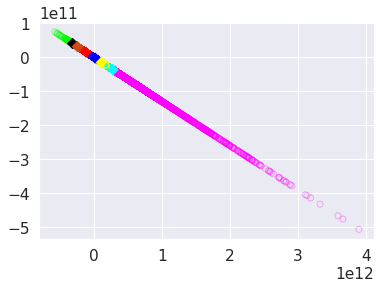

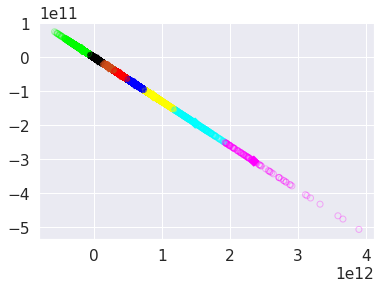

In [ ]:
# k = 8
Rnk8_PC10 = runKMeans(8, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

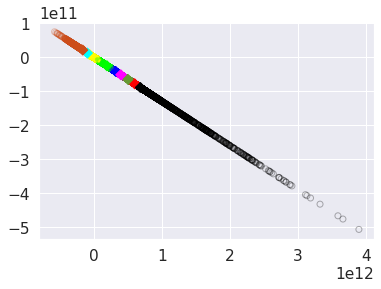

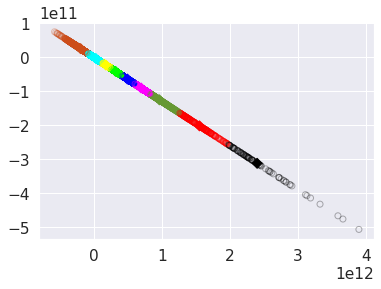

In [ ]:
# k = 9
Rnk9_PC10 = runKMeans(9, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

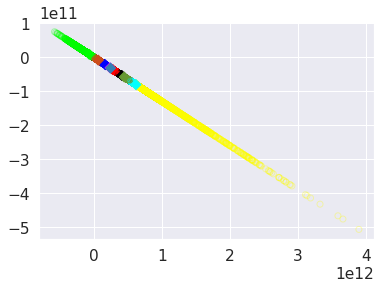

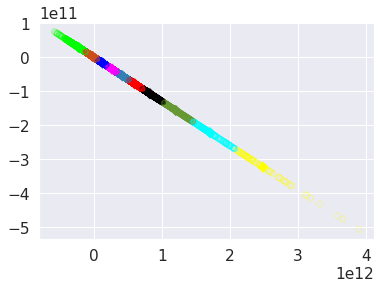

In [ ]:
# k = 10
Rnk10_PC10 = runKMeans(10, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst10.txt") 

#### **K Means with 7 clusters from scratch using Reconstructed Data with All Principal Components** 

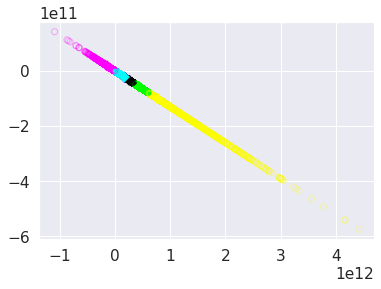

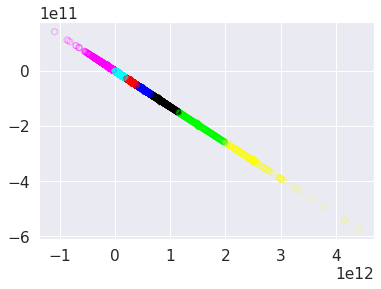

In [ ]:
# Reconstruct data using all the principal components 
ReconstData16 = np.matmul(U[:, 0:16], C[0:16]) + reshape_mean

np.savetxt("/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst16.txt", ReconstData16, delimiter= "\t") 

# Run K-Means (from scratch) on the reconstructed data
# k = 7
Rnk_PC16 = runKMeans(7, "/content/drive/MyDrive/COGS 118B Final Project/data/BeansReconst16.txt") 

### **PCA using Sklearn**

In [ ]:
# Associate Each bean with a Color for PCA 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
bean_colors = dict(zip(df_copy2["Class"].unique(), colors))
df_copy2["Color"] = ''
for ind, bean in enumerate(df_copy2["Class"]):
  df_copy2["Color"].iloc[ind] = bean_colors.get(bean)

df_copy2["Color"].unique()

array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
       '#e377c2'], dtype=object)

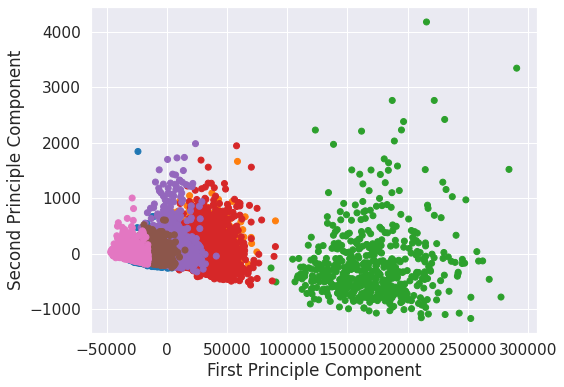

In [ ]:
# create and train the PCA model using 5 principal components
pca5 = PCA(n_components=5)
pca5_model = pca5.fit_transform(beans)

# visualize the data with reduced dimensions 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize=(8,6))
plt.scatter(pca5_model[:,0],pca5_model[:,1], c = df_copy2["Color"], cmap='winter')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

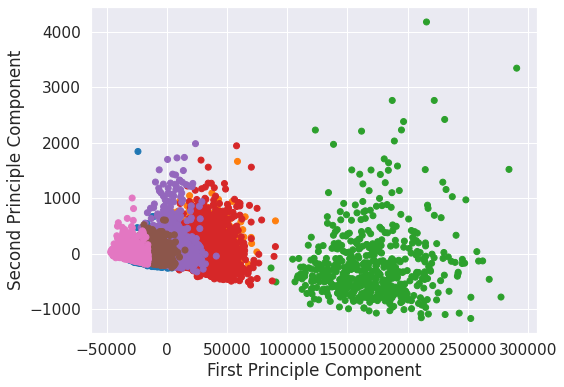

In [ ]:
# create and train the PCA model using 10 principal components
pca10 = PCA(n_components=10)
pca10_model = pca10.fit_transform(beans)

# visualize the data with reduced dimensions 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize=(8,6))
plt.scatter(pca10_model[:,0],pca10_model[:,1], c = df_copy2["Color"], cmap='winter')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

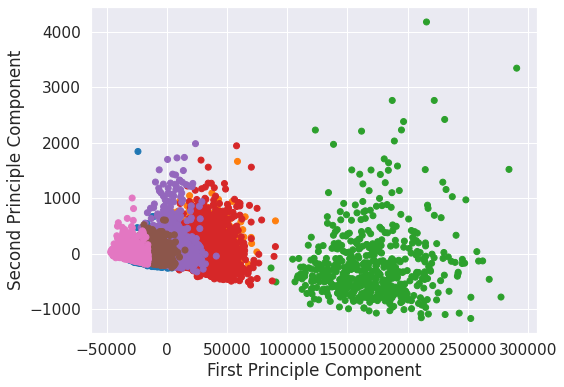

In [ ]:
# create and train the PCA model using all principal components
pca16 = PCA(n_components=16)
pca16_model = pca16.fit_transform(beans)

# visualize the data with reduced dimensions 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize=(8,6))
plt.scatter(pca16_model[:,0],pca16_model[:,1], c = df_copy2["Color"], cmap='winter')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()